In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_table('C:/Users/MCB User/Desktop/FastANI.tabular',header=None)
df = df.rename(columns={0:'query', 1:'ref', 2:'ANI'})[['query','ref','ANI']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2601 entries, 0 to 2600
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   query   2601 non-null   object 
 1   ref     2601 non-null   object 
 2   ANI     2601 non-null   float64
dtypes: float64(1), object(2)
memory usage: 61.1+ KB


In [3]:
to_replace = {r'_ASM(.)*': r'',
             r'strain_503_part_Bradyrhizobium(.)*': 'GCF_052180175_1',
             r'strain_RCAM104(.)*': 'strain RCAM104'}

df['query'] = df['query'].replace(to_replace, regex=True)
df['ref'] = df['ref'].replace(to_replace, regex=True)
df = df.drop_duplicates()
df.head()

,query,ref,ANI
0,GCF_041262425_1,GCF_041262425_1,100.0000
1,GCF_041262425_1,GCF_041262285_1,99.9954
2,GCF_041262425_1,GCF_041260485_1,99.9935
3,GCF_041262425_1,GCF_041261805_1,99.9935
4,GCF_041262425_1,GCF_041262465_1,99.9933


In [4]:
names=['GCF_041260445_1','GCF_041262105_1','GCF_041260485_1','GCF_041261105_1','GCF_041261805_1','GCF_041260905_1','GCF_041262465_1','GCF_041262285_1','GCF_041262425_1','GCF_000472725_1','GCF_044909495_1','GCF_034562915_1','GCF_009176665_1','GCF_036248165_1','GCF_036248065_1','GCF_036248085_1','GCF_041260325_1','GCF_041261365_1','GCF_036248005_1','GCF_036248025_1','GCF_036248185_1','GCF_036248045_1','GCF_036248105_1','GCF_036248125_1','GCF_036248145_1','GCF_018130425_1','GCF_030584805_1','GCF_041260965_1','GCF_044909535_1','GCF_041261925_1','GCF_041261705_1','GCF_044909195_1','GCF_002532025_1','GCF_041261945_1','GCF_044909505_1','strain RCAM104','GCF_052180175_1','GCF_040544315_1','GCF_040549665_1','GCF_040544295_1','GCF_018131235_1','GCF_040549625_1','GCF_041261765_1','GCF_041261145_1','GCF_002278135_3','GCF_018130265_1','GCF_018130405_1','GCF_044909555_1','GCF_038449195_1','GCF_037997155_1','GCF_038449185_1']

In [5]:
ANImatrix = df.pivot_table(index='query', columns='ref', values='ANI')

In [6]:
ANImatrix = ANImatrix[names].reindex(names)

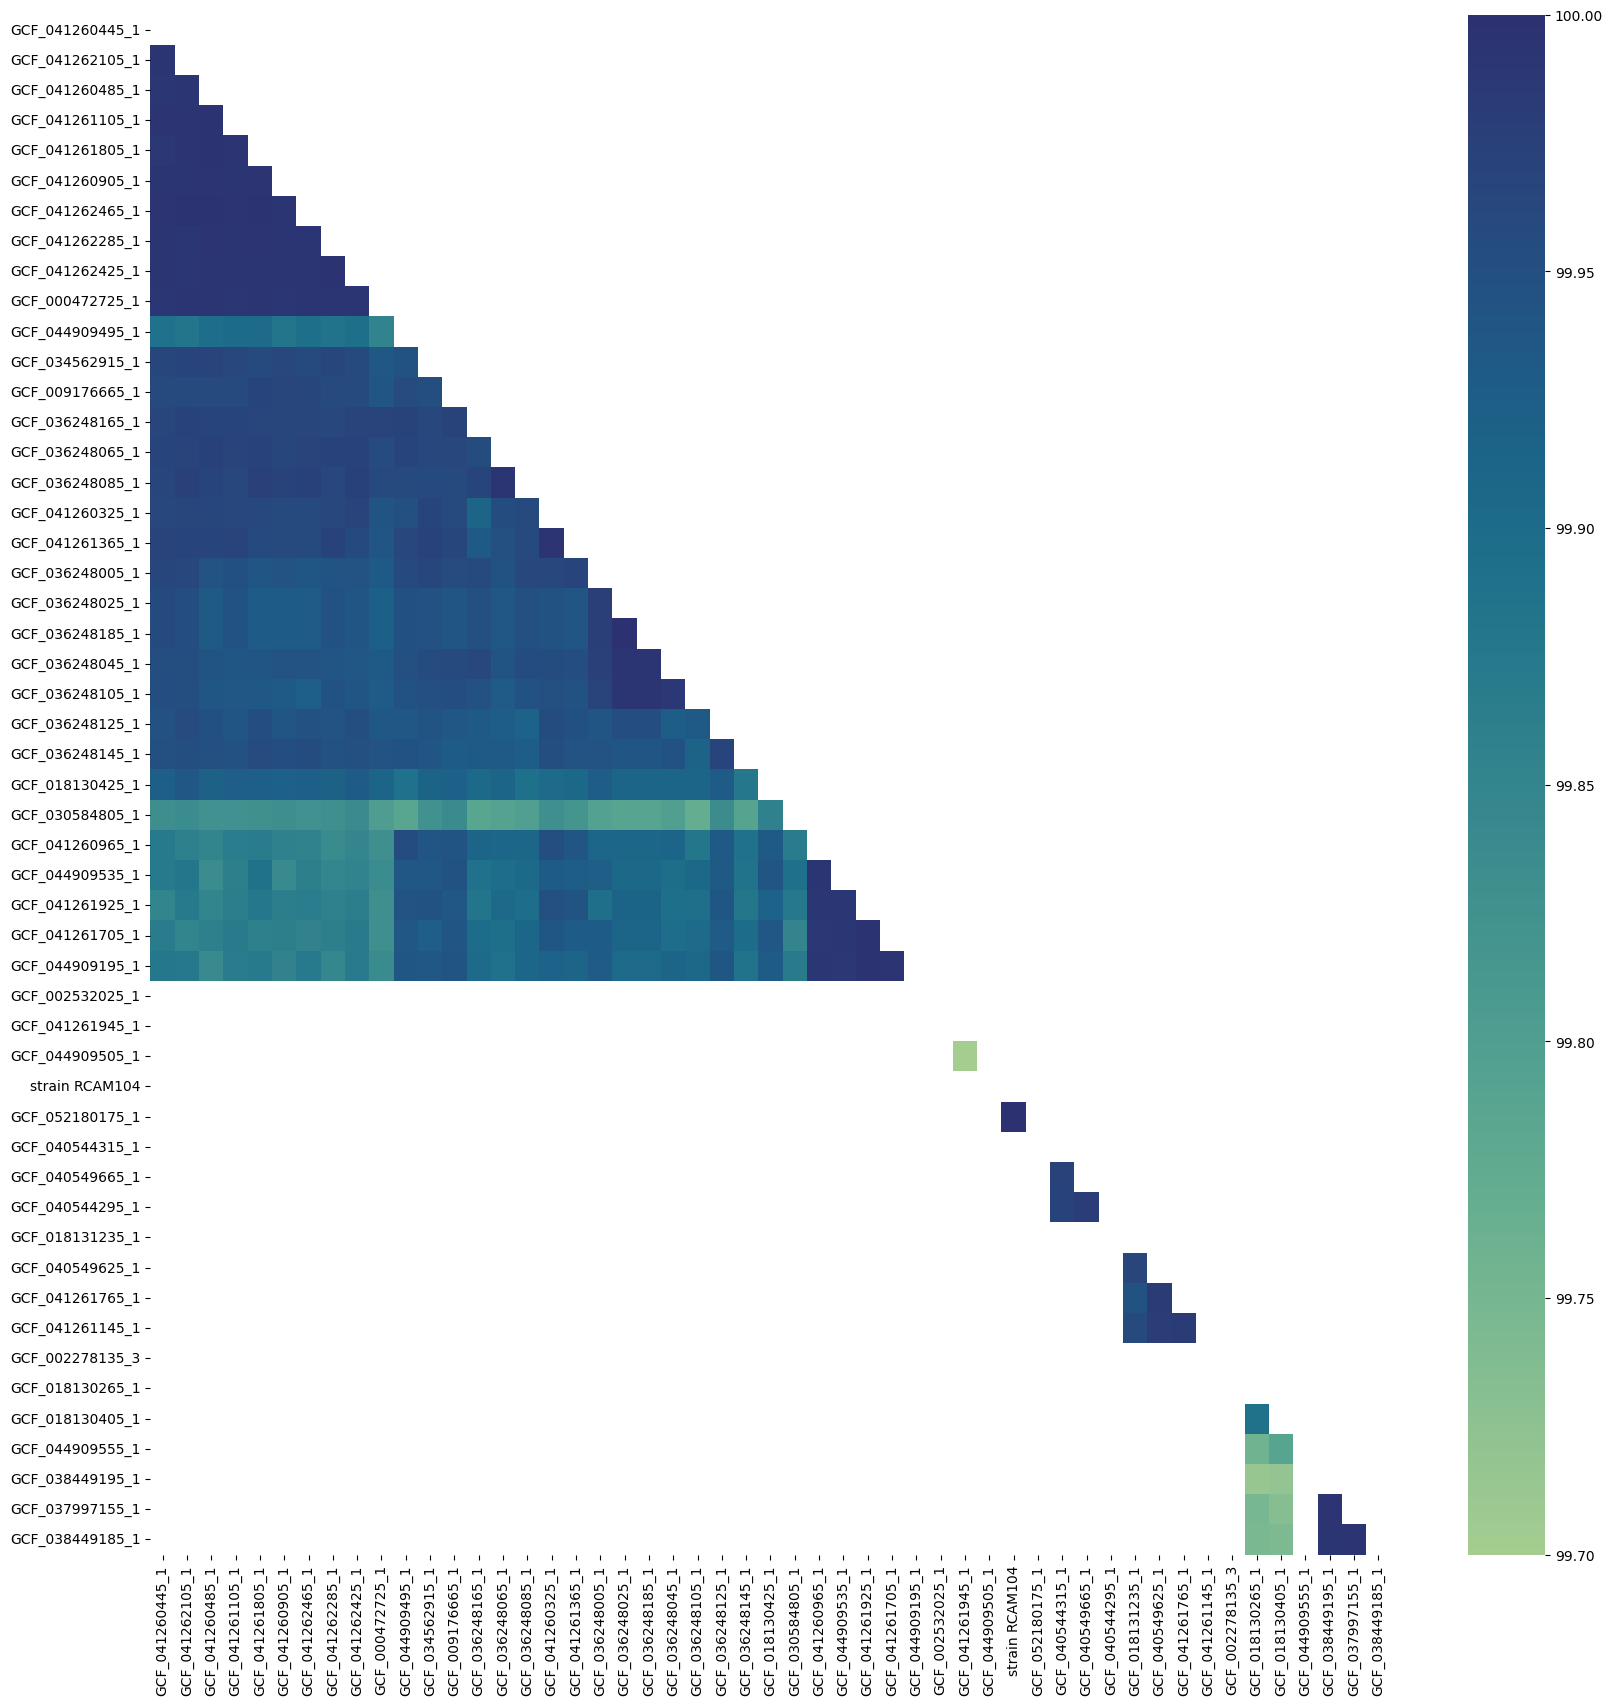

In [14]:
corr = ANImatrix.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = plt.get_cmap('crest')
cmap.set_under('white') 


fig = plt.figure()
fig.set_size_inches(20, 20)
ax = sns.heatmap(ANImatrix, mask=mask, cmap=cmap, vmin=99.7
                )
ax.set(xlabel="", ylabel="")
fig.savefig("ANIplot-99-7.png", dpi=600)